## Import Library

In [165]:
#main
import pandas as pd
import numpy as np
import os
#viz
import seaborn as sns 
import matplotlib.pyplot as plt 
#mod
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score

# Data Loading

## Run in google colab, need dataset from local

In [3]:
list_file = os.listdir('/content/High risk ')
list_file

['Batavia Dana Saham Clean.csv',
 'Manulife Saham Andalan Clean.csv',
 'BNI-AM Indeks IDX30 Clean.csv',
 'Sucroinvest Equity Fund Clean.csv',
 'BNI-AM Inspiring Equity Fund Clean.csv',
 'Sucroinvest Sharia Equity Fund Clean.csv',
 'Simas Saham Unggulan Clean.csv',
 'DanaReksa Mawah Konsumer 10 Kelas A Clean.csv',
 'Schroder 90 Plus Equity Fund Clean.csv',
 'Manulife Dana Saham Kelas A Clean.csv']

## List Dataset

In [4]:
dataset = []
for file in list_file:
  name = file.split('.')[0]
  dataset.append(name)
print(dataset)

['Batavia Dana Saham Clean', 'Manulife Saham Andalan Clean', 'BNI-AM Indeks IDX30 Clean', 'Sucroinvest Equity Fund Clean', 'BNI-AM Inspiring Equity Fund Clean', 'Sucroinvest Sharia Equity Fund Clean', 'Simas Saham Unggulan Clean', 'DanaReksa Mawah Konsumer 10 Kelas A Clean', 'Schroder 90 Plus Equity Fund Clean', 'Manulife Dana Saham Kelas A Clean']


In [5]:
df = {}
for i in dataset:
  df[i] = pd.read_csv('/content/High risk /' +i +'.csv')

In [6]:
df['Simas Saham Unggulan Clean'].tail(20)

,Unnamed: 0,date,value,Next,Class
46,46,2022-11-21,1321.6165,1318.2260,0
47,47,2022-11-22,1318.2260,1324.4558,1
48,48,2022-11-23,1324.4558,1330.5679,1
49,49,2022-11-24,1330.5679,1326.4103,0
50,50,2022-11-25,1326.4103,1321.9934,0
51,51,2022-11-28,1321.9934,1324.1436,1
52,52,2022-11-29,1324.1436,1341.6707,1
53,53,2022-11-30,1341.6707,1335.5037,0
54,54,2022-12-01,1335.5037,1332.7286,0
55,55,2022-12-02,1332.7286,1324.2340,0


In [7]:
df['Simas Saham Unggulan Clean'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  66 non-null     int64  
 1   date        66 non-null     object 
 2   value       66 non-null     float64
 3   Next        65 non-null     float64
 4   Class       66 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.7+ KB


In [8]:
for i in dataset:
  df[i]['date'] = pd.to_datetime(df[i]['date']) 

In [9]:
df['Simas Saham Unggulan Clean'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  66 non-null     int64         
 1   date        66 non-null     datetime64[ns]
 2   value       66 non-null     float64       
 3   Next        65 non-null     float64       
 4   Class       66 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.7 KB


In [10]:
for i in dataset:
  df[i] = df[i].set_index('date')

# Prerocessing

## Split train-test

In [11]:
data_new = {}
for i in dataset:
  size = int(len(df[i]) * 0.8)
  data_new[i] = {}
  data_new[i]['train'] = df[i]['value'].iloc[0:size]
  data_new[i]['test'] = df[i]['value'].iloc[size-1:len(df[i])]

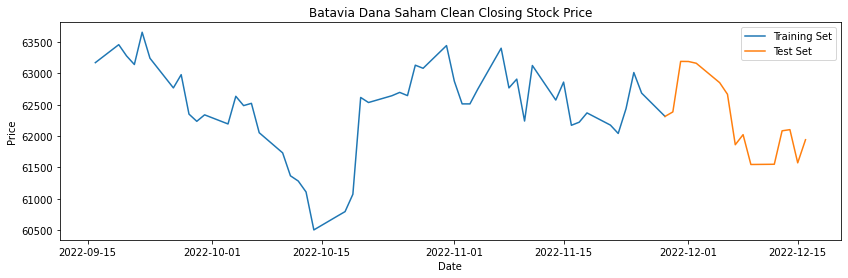

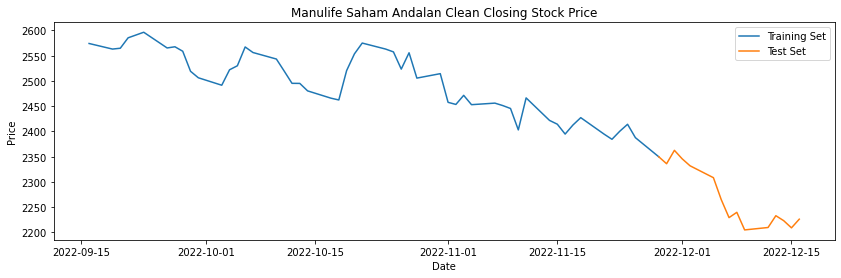

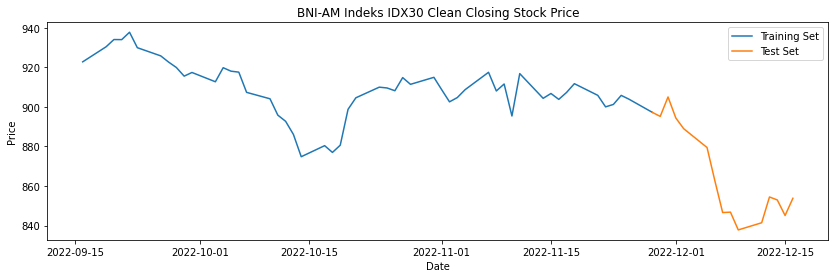

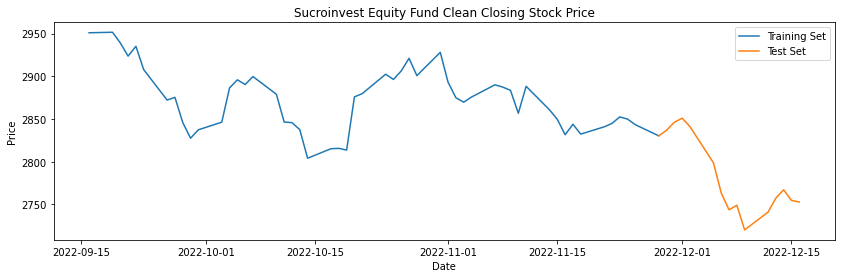

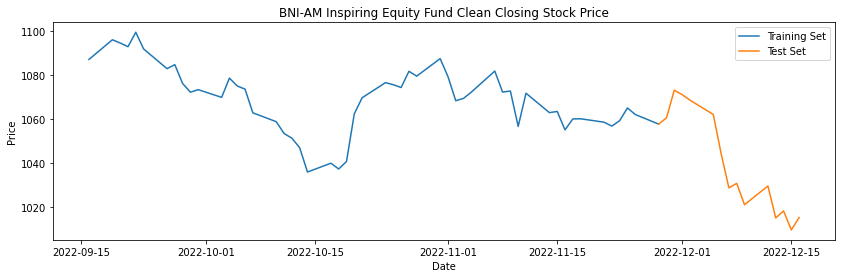

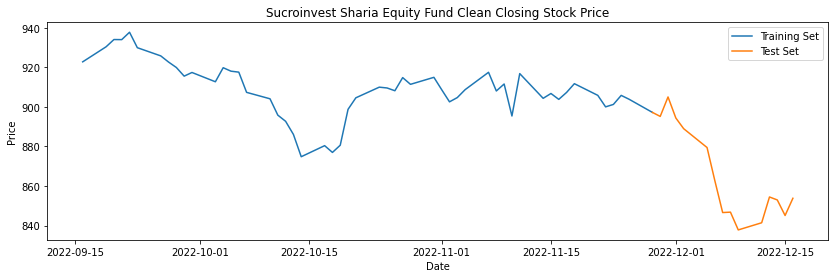

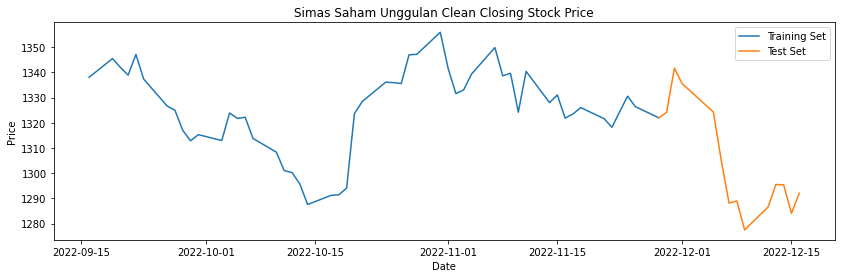

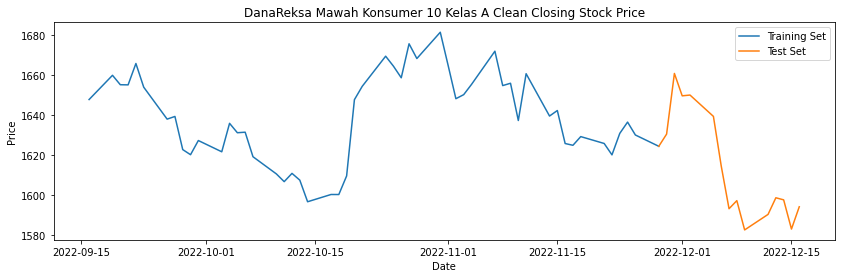

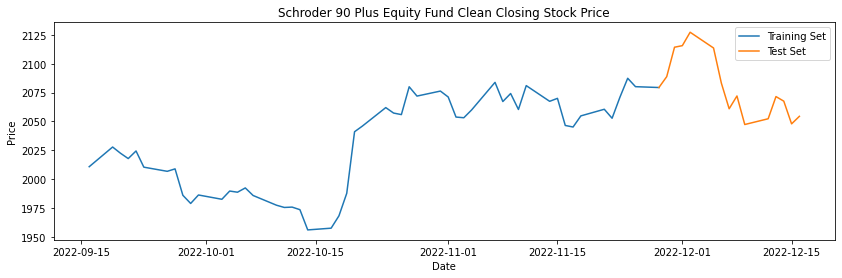

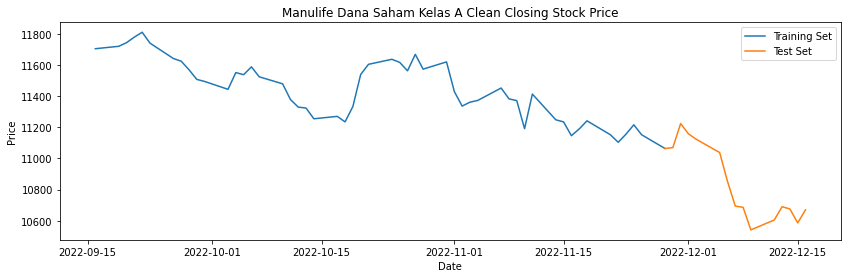

In [12]:
for i in dataset:
    plt.figure(figsize=(14,4))
    plt.plot(data_new[i]["train"])
    plt.plot(data_new[i]["test"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

In [13]:
df['Simas Saham Unggulan Clean'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2022-09-16 to 2022-12-16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  66 non-null     int64  
 1   value       66 non-null     float64
 2   Next        65 non-null     float64
 3   Class       66 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 2.6 KB


## Scalling

In [14]:
train_scaled = {}
test_scaled = {}
scaler = {}

for num, i in enumerate(dataset):
    sc = MinMaxScaler(feature_range=(0,1))
    train_reshape = np.array(data_new[i]["train"])
    test_reshape = np.array(data_new[i]["test"])
    train_reshape = train_reshape.reshape(-1,1)
    test_reshape = test_reshape.reshape(-1,1)
    train_scaled[i] = sc.fit_transform(train_reshape)
    test_scaled[i] = sc.transform(test_reshape)
    scaler[i] = sc


In [15]:
train_scaled['BNI-AM Indeks IDX30 Clean'].shape

(52, 1)

In [16]:
trainset = {}
testset = {}
for j in dataset:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(1, 48):
        X_train.append(train_scaled[j][i-1:i,0])
        y_train.append(train_scaled[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(1,14):
        X_test.append(test_scaled[j][i-1:i,0])
        y_test.append(test_scaled[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1]))
    testset[j]["y"] = y_test

In [17]:
arr_buff = []
for i in dataset:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=dataset)

,X_train,y_train,X_test,y_test
Batavia Dana Saham Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
Manulife Saham Andalan Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
BNI-AM Indeks IDX30 Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
Sucroinvest Equity Fund Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
BNI-AM Inspiring Equity Fund Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
Sucroinvest Sharia Equity Fund Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
Simas Saham Unggulan Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
DanaReksa Mawah Konsumer 10 Kelas A Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
Schroder 90 Plus Equity Fund Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
Manulife Dana Saham Kelas A Clean,"(47, 1)","(47,)","(13, 1)","(13,)"


# Model Definition

In [18]:
from keras.callbacks import EarlyStopping

class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_mae') is not None and logs.get('val_mae') < 0.015:
      self.model.stop_training = True

earlystop = EarlyStopping(monitor='val_mae', patience=50)

In [45]:
%%time
# The LSTM architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compiling the RNN
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, 
              metrics=["mae"], 
              loss=tf.keras.losses.Huber())

#Training Models
history = {}
for i in dataset:
    print("Train to", i)
    history[i] = model.fit(trainset[i]["X"], 
              trainset[i]["y"], 
              epochs=1000, 
              batch_size=8,
              validation_data=(testset[i]['X'], testset[i]['y']), 
              shuffle=False,
              callbacks=[Callback(), earlystop])

Streaming output truncated to the last 5000 lines.
Epoch 433/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.0131 - mae: 0.1345 - val_loss: 0.0805 - val_mae: 0.3463
Epoch 434/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.0117 - mae: 0.1278 - val_loss: 0.0805 - val_mae: 0.3463
Epoch 435/1000
6/6 [==============================] - 1s 191ms/step - loss: 0.0114 - mae: 0.1249 - val_loss: 0.0805 - val_mae: 0.3463
Epoch 436/1000
6/6 [==============================] - 0s 93ms/step - loss: 0.0108 - mae: 0.1215 - val_loss: 0.0805 - val_mae: 0.3463
Epoch 437/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.0114 - mae: 0.1264 - val_loss: 0.0804 - val_mae: 0.3463
Epoch 438/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0121 - mae: 0.1227 - val_loss: 0.0804 - val_mae: 0.3463
Epoch 439/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.0135 - mae: 0.1406 - val_loss: 0.0804 - val_mae: 0.3462
Epoch 440/1000
6/

# Model Evaluation

1/1 [==============================] - 0s 52ms/step


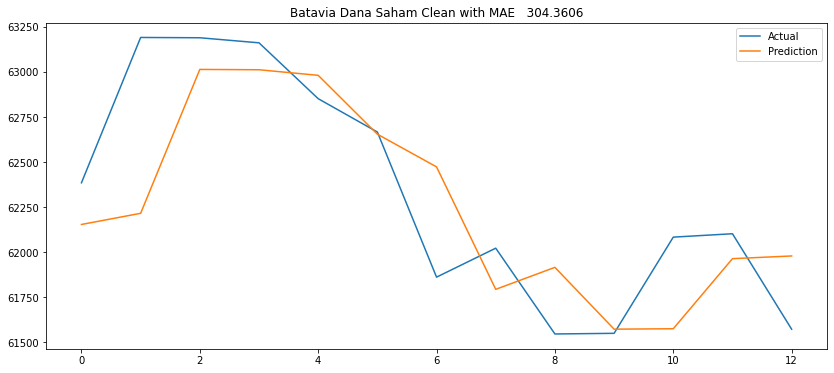

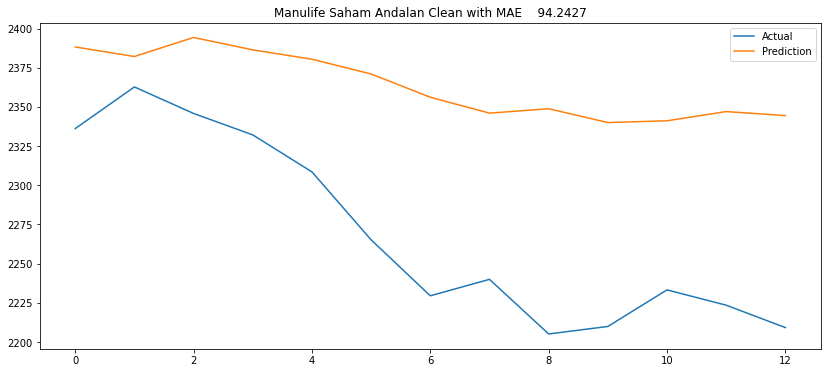

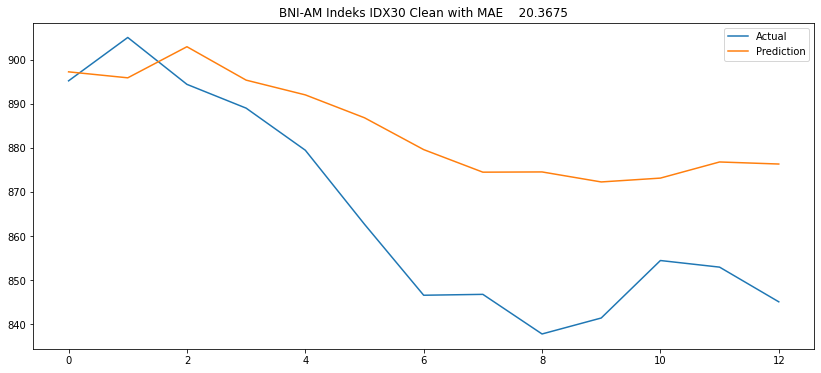

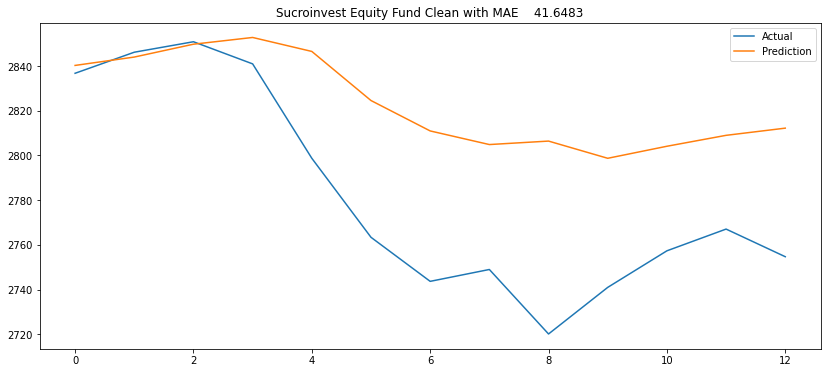

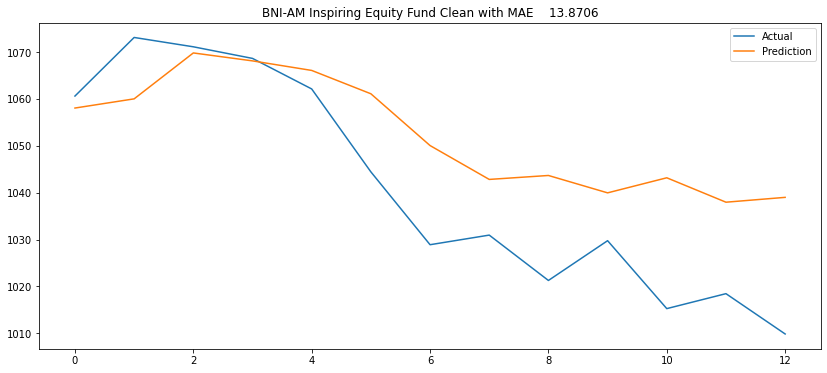

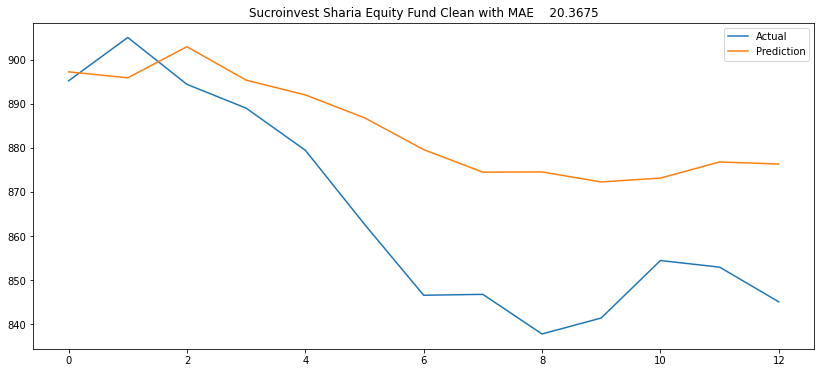

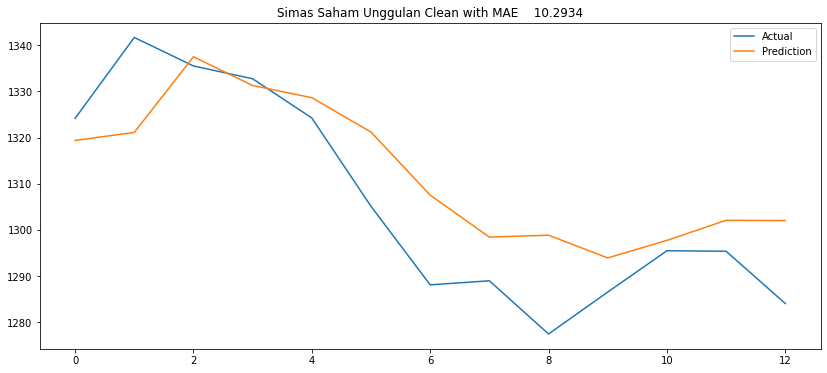

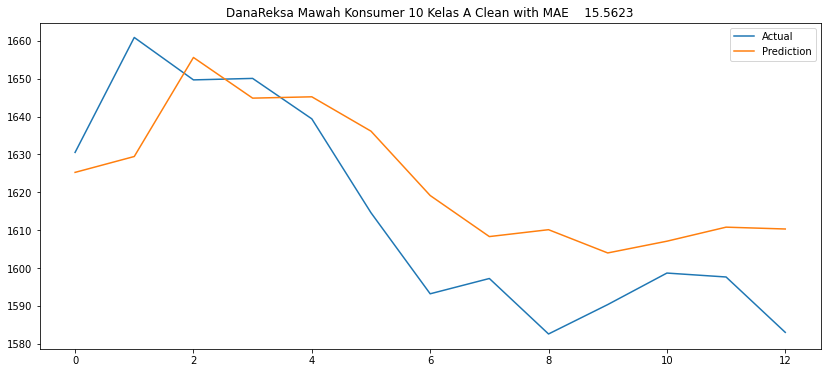

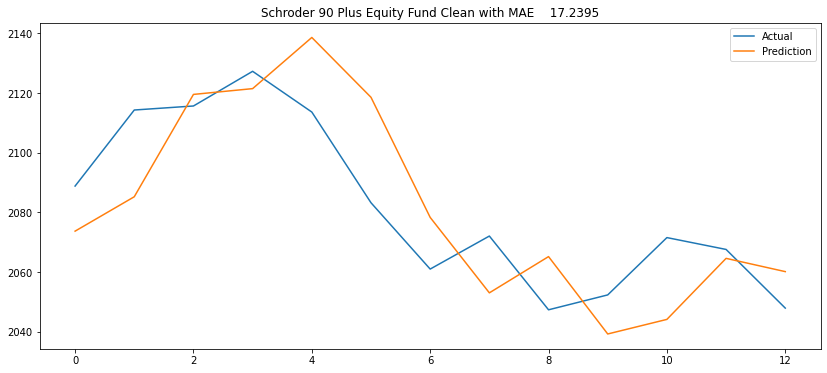

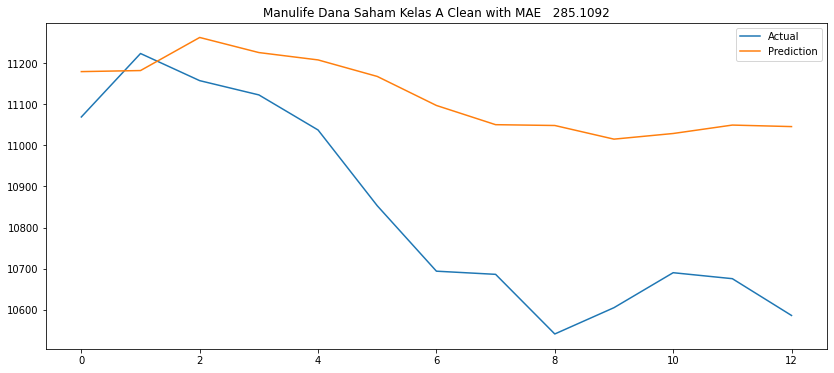

In [195]:
pred_result = {}
for i in dataset:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
    MAE = mean_absolute_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MAE {:10.4f}".format(i, MAE))
    plt.plot(y_true)
    plt.plot(y_pred)
    plt.legend(labels=['Actual', 'Prediction'])
    plt.show

## Find mean of MAE in all dataset

In [198]:
mae_df = []
for i in dataset:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
    MAE = mean_absolute_error(y_true, y_pred)
    mae_df.append(MAE)

a = pd.DataFrame(mae_df, columns=['MAE'], index=dataset)
b = a['MAE'].mean()


print(f'Nilai rata-rata MAE : {b}')
a


1/1 [==============================] - 0s 33ms/step
Nilai rata-rata MAE : 82.30614591346176


,MAE
Batavia Dana Saham Clean,304.360553
Manulife Saham Andalan Clean,94.242724
BNI-AM Indeks IDX30 Clean,20.367459
Sucroinvest Equity Fund Clean,41.648305
BNI-AM Inspiring Equity Fund Clean,13.870582
Sucroinvest Sharia Equity Fund Clean,20.367459
Simas Saham Unggulan Clean,10.293363
DanaReksa Mawah Konsumer 10 Kelas A Clean,15.562299
Schroder 90 Plus Equity Fund Clean,17.239530
Manulife Dana Saham Kelas A Clean,285.109186


Batavia Dana Saham Clean - Loss & MAE


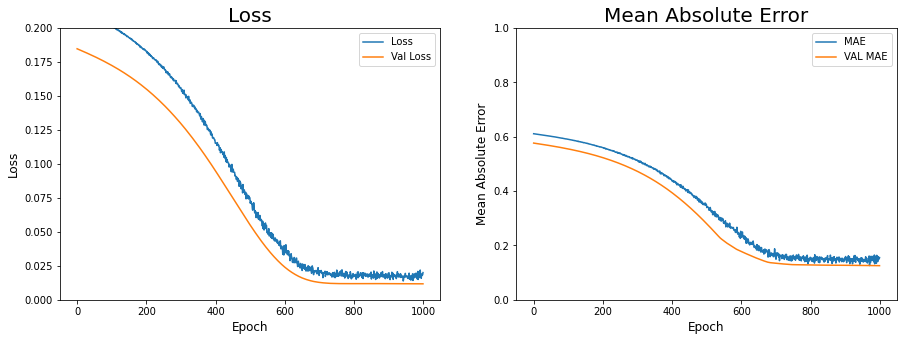

Manulife Saham Andalan Clean - Loss & MAE


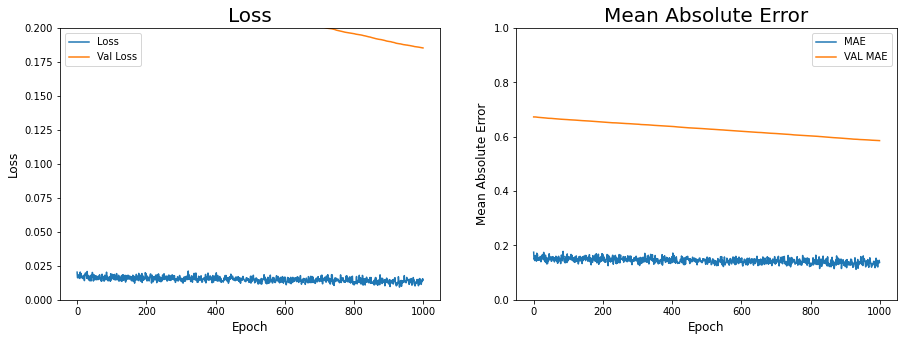

BNI-AM Indeks IDX30 Clean - Loss & MAE


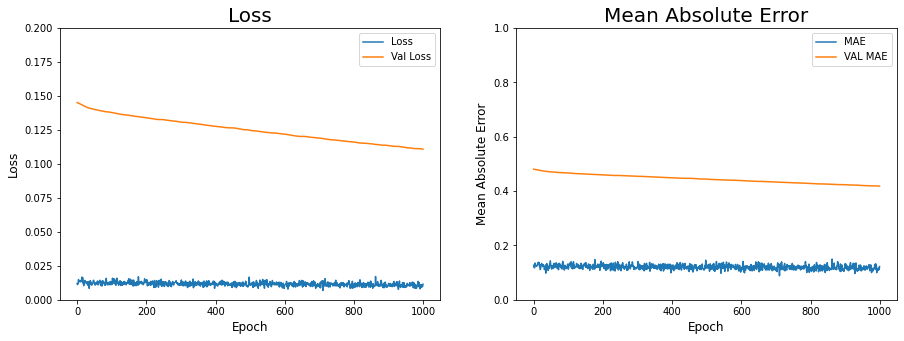

Sucroinvest Equity Fund Clean - Loss & MAE


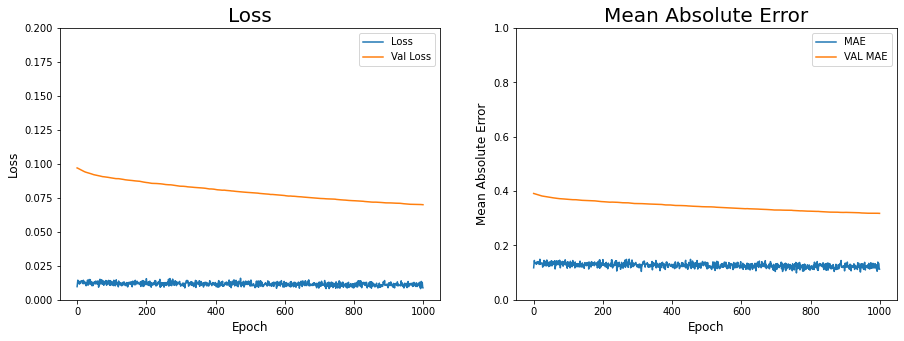

BNI-AM Inspiring Equity Fund Clean - Loss & MAE


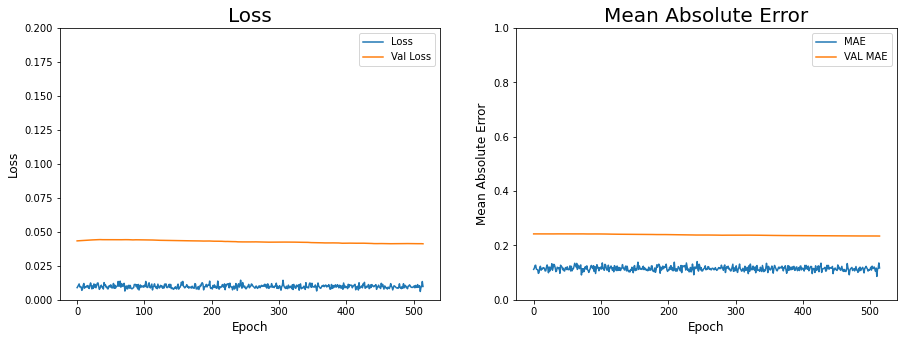

Sucroinvest Sharia Equity Fund Clean - Loss & MAE


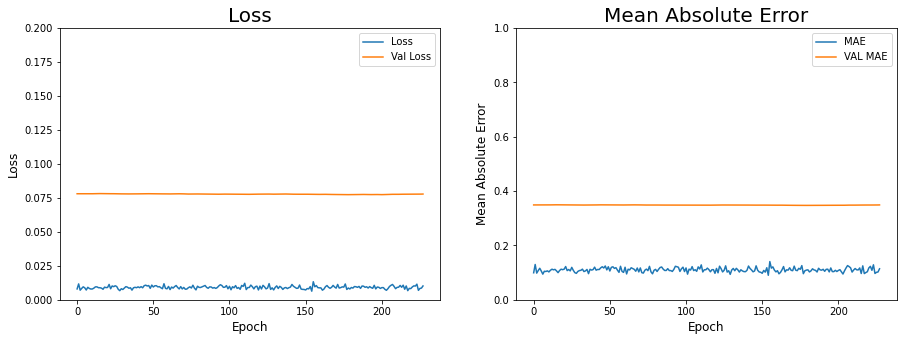

Simas Saham Unggulan Clean - Loss & MAE


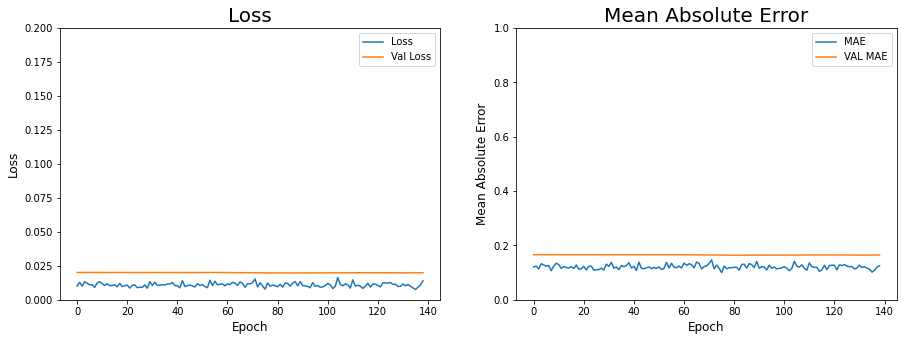

DanaReksa Mawah Konsumer 10 Kelas A Clean - Loss & MAE


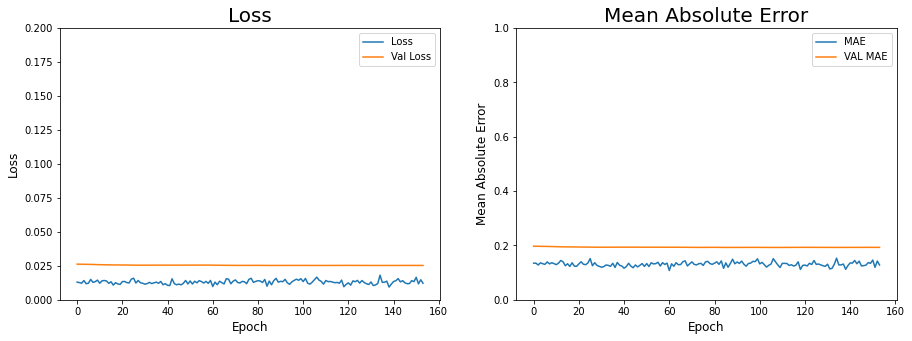

Schroder 90 Plus Equity Fund Clean - Loss & MAE


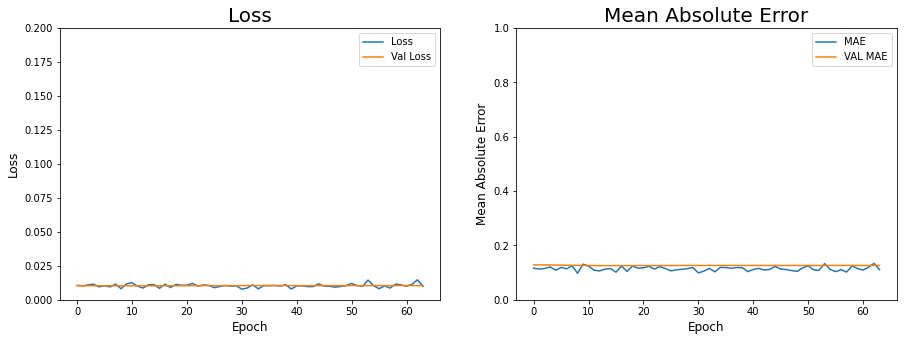

Manulife Dana Saham Kelas A Clean - Loss & MAE


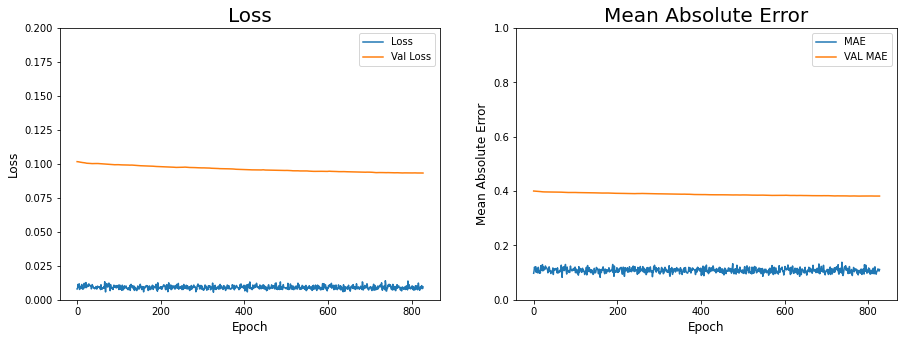

In [55]:
for i in dataset:
  print(i,"- Loss & MAE")
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
  ax1.plot(history[i].history['loss'])
  ax1.plot(history[i].history['val_loss'])
  ax1.legend(['Loss','Val Loss'])
  ax1.set_ylim(ymin=0, ymax=0.2)  
  ax1.set_xlabel('Epoch', fontsize=12)
  ax1.set_ylabel('Loss', fontsize=12)
  ax1.set_title('Loss', fontsize=20)

  ax2.plot(history[i].history['mae'])
  ax2.plot(history[i].history['val_mae'])
  ax2.legend(['MAE','VAL MAE'])
  ax2.set_ylim(ymin=0, ymax=1)
  ax2.set_xlabel('Epoch', fontsize=12)
  ax2.set_ylabel('Mean Absolute Error', fontsize=12)
  ax2.set_title('Mean Absolute Error', fontsize=20)
  plt.show()

# Forecasting

In [48]:
from datetime import datetime 
win = 2
out = []
def forecast(day, x):
  data_inf = df[x]['value'].copy()
  for j in range(day):
    X = np.array(data_inf[-2:])
    X = X.reshape(X.shape[0],1)  
    X_scaled = scaler[x].transform(X)
    X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, 1))
    new_idx = datetime(data_inf.index.year[-1], data_inf.index.month[-1], data_inf.index.day[-1]+1)
    xvalue = scaler[x].inverse_transform(model.predict(X_scaled))
    data_inf[new_idx] = np.round(xvalue[1][0])
  return data_inf

## Next Day

In [49]:
predictors = {}
npred = {}
for i, val in enumerate(dataset):
  npred = {}
  print(i,"-",val)
  npred = forecast(2, val)
  print(npred[-3:])
  

0 - Batavia Dana Saham Clean
1/1 [==============================] - 2s 2s/step
date
2022-12-16    61942.0
2022-12-17    61854.0
2022-12-18    61789.0
Name: value, dtype: float64
1 - Manulife Saham Andalan Clean
1/1 [==============================] - 0s 25ms/step
date
2022-12-16    2226.38
2022-12-17    2345.00
2022-12-18    2386.00
Name: value, dtype: float64
2 - BNI-AM Indeks IDX30 Clean
1/1 [==============================] - 0s 19ms/step
date
2022-12-16    853.78
2022-12-17    877.00
2022-12-18    886.00
Name: value, dtype: float64
3 - Sucroinvest Equity Fund Clean
1/1 [==============================] - 0s 21ms/step
date
2022-12-16    2752.81
2022-12-17    2808.00
2022-12-18    2829.00
Name: value, dtype: float64
4 - BNI-AM Inspiring Equity Fund Clean
1/1 [==============================] - 0s 20ms/step
date
2022-12-16    1015.4785
2022-12-17    1038.0000
2022-12-18    1047.0000
Name: value, dtype: float64
5 - Sucroinvest Sharia Equity Fund Clean
1/1 [==============================] -

In [50]:
label = []
percent = []
saham = []
values = []

for i, val in enumerate(dataset):
  npred = {}
  npred = forecast(1, val)

  if npred[-2] <= npred[-1]:
    xy = npred[-1] - npred[-2]
    per = round(xy/npred[-2]*100,2)
    percent.append(per)
    label.append(1)
    saham.append(val)
    values.append(npred[-1])
  else:
    xy = npred[-1] - npred[-2]
    per = round(xy/npred[-2]*100,2)
    percent.append(per)
    label.append(0)
    saham.append(val)
    values.append(npred[-1])    

1/1 [==============================] - 1s 911ms/step


In [51]:
outputs = {
    'Mutual_funds' : saham,
    'Predicted_NAV' : values,
    'Percentage' : percent,
    'Label' : label
}

In [52]:
final_saham = pd.DataFrame(outputs)
final_saham

,Mutual_funds,Predicted_NAV,Percentage,Label
0,Batavia Dana Saham Clean,61854.0,-0.14,0
1,Manulife Saham Andalan Clean,2345.0,5.33,1
2,BNI-AM Indeks IDX30 Clean,877.0,2.72,1
3,Sucroinvest Equity Fund Clean,2808.0,2.00,1
4,BNI-AM Inspiring Equity Fund Clean,1038.0,2.22,1
5,Sucroinvest Sharia Equity Fund Clean,877.0,2.72,1
6,Simas Saham Unggulan Clean,1300.0,0.61,1
7,DanaReksa Mawah Konsumer 10 Kelas A Clean,1609.0,0.93,1
8,Schroder 90 Plus Equity Fund Clean,2046.0,-0.41,0
9,Manulife Dana Saham Kelas A Clean,11045.0,3.51,1


In [56]:
final_saham.to_csv('Final_highrisk.csv')